## MULTIPLE LINEAR REGRESSION

Tasks:


1.Perform exploratory data analysis (EDA) to gain insights into the dataset. Provide visualizations and summary statistics of the variables. Pre-process the data to apply the MLR.


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# load the Dataset

data = pd.read_csv('ToyotaCorolla_MLR.csv')
data.head()

,Price,Age_08_04,KM,Fuel_Type,HP,Automatic,cc,Doors,Cylinders,Gears,Weight
0,13500,23,46986,Diesel,90,0,2000,3,4,5,1165
1,13750,23,72937,Diesel,90,0,2000,3,4,5,1165
2,13950,24,41711,Diesel,90,0,2000,3,4,5,1165
3,14950,26,48000,Diesel,90,0,2000,3,4,5,1165
4,13750,30,38500,Diesel,90,0,2000,3,4,5,1170


In [3]:
data.shape

(1436, 11)

In [4]:
data.isnull().sum()

Price        0
Age_08_04    0
KM           0
Fuel_Type    0
HP           0
Automatic    0
cc           0
Doors        0
Cylinders    0
Gears        0
Weight       0
dtype: int64

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1436 entries, 0 to 1435
Data columns (total 11 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Price      1436 non-null   int64 
 1   Age_08_04  1436 non-null   int64 
 2   KM         1436 non-null   int64 
 3   Fuel_Type  1436 non-null   object
 4   HP         1436 non-null   int64 
 5   Automatic  1436 non-null   int64 
 6   cc         1436 non-null   int64 
 7   Doors      1436 non-null   int64 
 8   Cylinders  1436 non-null   int64 
 9   Gears      1436 non-null   int64 
 10  Weight     1436 non-null   int64 
dtypes: int64(10), object(1)
memory usage: 123.5+ KB


In [6]:
data[data.duplicated()]

,Price,Age_08_04,KM,Fuel_Type,HP,Automatic,cc,Doors,Cylinders,Gears,Weight
113,24950,8,13253,Diesel,116,0,2000,5,4,5,1320


In [7]:
data.drop_duplicates(inplace=True)

In [8]:
data[data.duplicated()]

,Price,Age_08_04,KM,Fuel_Type,HP,Automatic,cc,Doors,Cylinders,Gears,Weight


In [9]:
data.shape

(1435, 11)

In [10]:
data.describe()

,Price,Age_08_04,KM,HP,Automatic,cc,Doors,Cylinders,Gears,Weight
count,1435.000000,1435.000000,1435.000000,1435.000000,1435.000000,1435.000000,1435.000000,1435.0,1435.000000,1435.000000
mean,10720.915679,55.980488,68571.782578,101.491986,0.055749,1576.560976,4.032753,4.0,5.026481,1072.287108
std,3608.732978,18.563312,37491.094553,14.981408,0.229517,424.387533,0.952667,0.0,0.188575,52.251882
min,4350.000000,1.000000,1.000000,69.000000,0.000000,1300.000000,2.000000,4.0,3.000000,1000.000000
25%,8450.000000,44.000000,43000.000000,90.000000,0.000000,1400.000000,3.000000,4.0,5.000000,1040.000000
50%,9900.000000,61.000000,63451.000000,110.000000,0.000000,1600.000000,4.000000,4.0,5.000000,1070.000000
75%,11950.000000,70.000000,87041.500000,110.000000,0.000000,1600.000000,5.000000,4.0,5.000000,1085.000000
max,32500.000000,80.000000,243000.000000,192.000000,1.000000,16000.000000,5.000000,4.0,6.000000,1615.000000


In [11]:
## converting categorical column
from sklearn.preprocessing import LabelEncoder
LE = LabelEncoder()

for col in data.columns:
    if data[col].dtype == 'object':
        data[col] = LE.fit_transform(data[col])
data.head()

,Price,Age_08_04,KM,Fuel_Type,HP,Automatic,cc,Doors,Cylinders,Gears,Weight
0,13500,23,46986,1,90,0,2000,3,4,5,1165
1,13750,23,72937,1,90,0,2000,3,4,5,1165
2,13950,24,41711,1,90,0,2000,3,4,5,1165
3,14950,26,48000,1,90,0,2000,3,4,5,1165
4,13750,30,38500,1,90,0,2000,3,4,5,1170


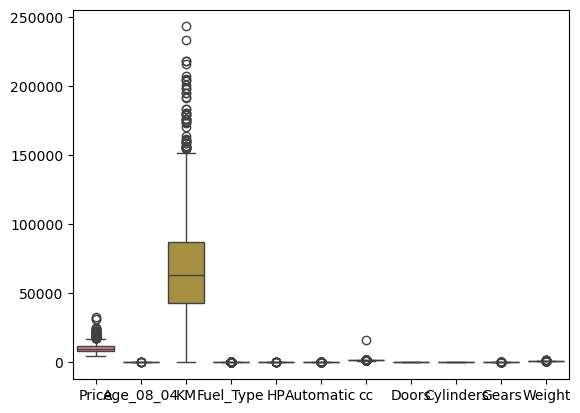

In [12]:
## checking outliers

sns.boxplot(data)
plt.show()

In [13]:
# checking outliers for each variables

Q1 = data.quantile(0.25)
Q3 = data.quantile(0.75)
IQR = Q3-Q1
Outliers = ((data > (Q3 +(1.5 * IQR))) | (data < (Q1 -(1.5 * IQR)))).sum()
Outliers

Price        109
Age_08_04      7
KM            49
Fuel_Type    171
HP            11
Automatic     80
cc           122
Doors          0
Cylinders      0
Gears         46
Weight        65
dtype: int64

Observed many outliers, if model is not properly fitted, will remove required outliers

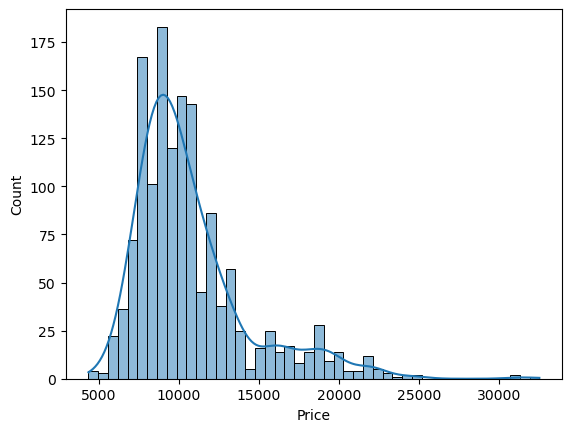

In [14]:
## Distribution of Price [Target variable is Price]

sns.histplot(data['Price'], kde=True)
plt.show()

In [15]:
# check correlation and heatmap

data.corr()

,Price,Age_08_04,KM,Fuel_Type,HP,Automatic,cc,Doors,Cylinders,Gears,Weight
Price,1.000000,-0.876273,-0.569420,-0.015883,0.314134,0.033928,0.124375,0.183604,NaN,0.063831,0.575869
Age_08_04,-0.876273,1.000000,0.504575,0.076382,-0.155293,0.031354,-0.096549,-0.146929,NaN,-0.005629,-0.466484
KM,-0.569420,0.504575,1.000000,-0.424118,-0.332904,-0.082168,0.103822,-0.035193,NaN,0.014890,-0.023969
Fuel_Type,-0.015883,0.076382,-0.424118,1.000000,0.411973,0.069456,-0.276236,-0.025339,NaN,0.069560,-0.502479
HP,0.314134,-0.155293,-0.332904,0.411973,1.000000,0.013313,0.035207,0.091803,NaN,0.209642,0.087143
Automatic,0.033928,0.031354,-0.082168,0.069456,0.013313,1.000000,0.066934,-0.027492,NaN,-0.098582,0.058499
cc,0.124375,-0.096549,0.103822,-0.276236,0.035207,0.066934,1.000000,0.079254,NaN,0.014732,0.335077
Doors,0.183604,-0.146929,-0.035193,-0.025339,0.091803,-0.027492,0.079254,1.000000,NaN,-0.160101,0.301734
Cylinders,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Gears,0.063831,-0.005629,0.014890,0.069560,0.209642,-0.098582,0.014732,-0.160101,NaN,1.000000,0.021238


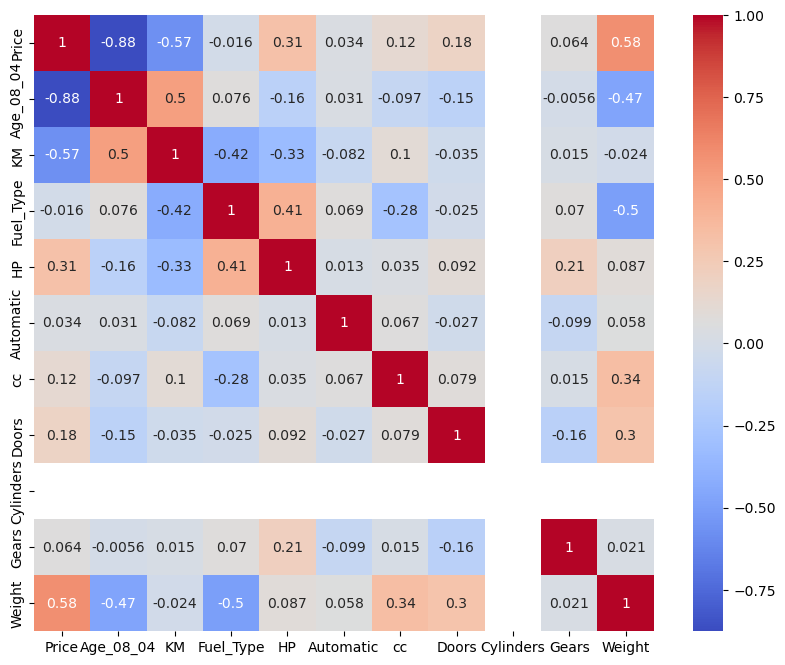

In [16]:
plt.figure(figsize=(10,8))
sns.heatmap(data.corr(), annot=True, cmap='coolwarm')
plt.show()

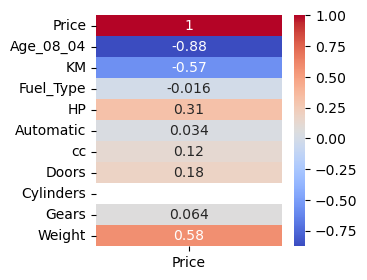

In [59]:
plt.figure(figsize=(3,3))
sns.heatmap(data.corr()[['Price']], annot=True, cmap='coolwarm')
plt.show()

This is a correlation matrix.

-  It shows the relationship between every pair of variables
-  Values range from –1 to +1
-  Value is close to –1, so it is a strong negative correlation
------------------------------------------------------------------------
+0.7 to +1.0	Strong positive

+0.3 to +0.7	Moderate positive

0 to +0.3	Weak positive

0	No relation

0 to –0.3	Weak negative

–0.3 to –0.7	Moderate negative

–0.7 to –1.0	Strong negative

----------------------------------------------------------------------
- Age_08_04	 –> -0.88 -> Strong negative
- KM  -> -0.57 -> Moderate negative
- Fuel_Type	–> -0.016 -> No relation
- HP	+0.31	Moderate positive
- Automatic	+0.034	No relation
- cc	+0.12	Weak positive
- Doors	+0.18	Weak positive
- Gears	+0.064	Very weak positive
- Weight	+0.58	Moderate positive

In [17]:
## to find coefficients and intercepts

import statsmodels.formula.api as smf
model = smf.ols('Price~Age_08_04+KM+Fuel_Type+HP+Automatic+cc+Doors+Cylinders+Gears+Weight',data=data).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.864
Model:                            OLS   Adj. R-squared:                  0.863
Method:                 Least Squares   F-statistic:                     1004.
Date:                Tue, 06 Jan 2026   Prob (F-statistic):               0.00
Time:                        19:18:53   Log-Likelihood:                -12360.
No. Observations:                1435   AIC:                         2.474e+04
Df Residuals:                    1425   BIC:                         2.479e+04
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   -570.7976     87.034     -6.558      0.000    -741.526    -400.069
Age_08_04   -123.8518      2.627    -47.147      0.000    -129.005    -118.699
KM            -0.0174      0.001    -13.287      0.000      -0.020      -0.015
Fuel_Type    583.4857    146.481      3.983      0.000     296.144     870.827
HP            23.5941      2.873      8.213      0.000      17.959      29.230
Automatic    306.8573    158.499      1.936      0.053      -4.059     617.773
cc            -0.0546      0.090     -0.607      0.544      -0.231       0.122
Doors        -29.0239     40.335     -0.720      0.472    -108.147      50.099
Cylinders  -2283.1905    348.135     -6.558      0.000   -2966.103   -1600.278
Gears        625.5361    197.459      3.168      0.002     238.194    1012.878
Weight        20.6201      1.026     20.106      0.000      18.608      22.632
==============================================================================
Omnibus:                      257.094   Durbin-Watson:                   1.606
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             2664.142
Skew:                          -0.505   Prob(JB):                         0.00
Kurtosis:                       9.598   Cond. No.                     5.08e+20
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 3.39e-29. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

All Variables not impacted , no need to check VIF(variance influence factor)


## feature selection [Model-1]

In [18]:
data.head()

,Price,Age_08_04,KM,Fuel_Type,HP,Automatic,cc,Doors,Cylinders,Gears,Weight
0,13500,23,46986,1,90,0,2000,3,4,5,1165
1,13750,23,72937,1,90,0,2000,3,4,5,1165
2,13950,24,41711,1,90,0,2000,3,4,5,1165
3,14950,26,48000,1,90,0,2000,3,4,5,1165
4,13750,30,38500,1,90,0,2000,3,4,5,1170


In [19]:
X1 = data.drop(columns=['Price'])
y1 = data['Price']

In [20]:
X1.head()

,Age_08_04,KM,Fuel_Type,HP,Automatic,cc,Doors,Cylinders,Gears,Weight
0,23,46986,1,90,0,2000,3,4,5,1165
1,23,72937,1,90,0,2000,3,4,5,1165
2,24,41711,1,90,0,2000,3,4,5,1165
3,26,48000,1,90,0,2000,3,4,5,1165
4,30,38500,1,90,0,2000,3,4,5,1170


In [21]:
y1.head()

0    13500
1    13750
2    13950
3    14950
4    13750
Name: Price, dtype: int64

In [22]:
### Train-Test Split the Data for Model-1 : (80% - 20%)

from sklearn.model_selection import train_test_split
X1_train,X1_test,y1_train,y1_test = train_test_split(X1,y1,test_size=0.2,random_state=42)
X1_train.shape,X1_test.shape,y1_train.shape,y1_test.shape

((1148, 10), (287, 10), (1148,), (287,))

In [23]:
# Linear Regression for Model-1

from sklearn.linear_model import LinearRegression
LR1 = LinearRegression()
LR1.fit(X1_train,y1_train)

LinearRegression()

In [24]:
y1_pred = LR1.predict(X1_test)

In [25]:
def evaluate_MLR(y_test, y_pred):
    MSE = mean_squared_error(y_test, y_pred)
    RMSE = np.sqrt(MSE)
    MAE = mean_absolute_error(y_test, y_pred)
    R2 = r2_score(y_test, y_pred)
    y = data['Price']
    mean_y = y.mean()
    error_pct = RMSE/mean_y
    
    print('Mean_Sqared Error :', MSE)
    print('Root Mean_Sqared Error :', RMSE)
    print('Mean_Absolute Error :', MAE)
    print('R2 Score  :', R2)
    print('Error Percentage :',error_pct)


Model -1 : Error Percentage got 13%, 

further analysis removed unwanted and no corelation variables

## feature selection [Model-2]

Reduced Features (Remove weak correlations)

In [26]:
# few selected features

selected_features = ['Age_08_04', 'KM', 'HP', 'Weight','Automatic','Gears']
X2 = data[selected_features]
y2 = data['Price']

# split the data
X2_train,X2_test,y2_train,y2_test = train_test_split(X2,y2,test_size=0.2,random_state=42)

# model fitting
LR2 = LinearRegression()
LR2.fit(X2_train,y2_train)

LinearRegression()

In [27]:
y2_pred = LR2.predict(X2_test)

## feature selection [Model-3]

In [28]:
# few selected features

selected_features = ['Age_08_04', 'KM', 'HP', 'Weight','Gears','cc','Doors']
X3 = data[selected_features]
y3 = data['Price']

# split the data
X3_train,X3_test,y3_train,y3_test = train_test_split(X3,y3,test_size=0.2,random_state=42)

# model fitting
LR3 = LinearRegression()
LR3.fit(X3_train,y3_train)

LinearRegression()

In [29]:
y3_pred = LR3.predict(X3_test)

## feature selection [Model with standardized]

In [30]:
data.head()

,Price,Age_08_04,KM,Fuel_Type,HP,Automatic,cc,Doors,Cylinders,Gears,Weight
0,13500,23,46986,1,90,0,2000,3,4,5,1165
1,13750,23,72937,1,90,0,2000,3,4,5,1165
2,13950,24,41711,1,90,0,2000,3,4,5,1165
3,14950,26,48000,1,90,0,2000,3,4,5,1165
4,13750,30,38500,1,90,0,2000,3,4,5,1170


In [31]:
X = data.drop(columns=['Price'])
y_S = data['Price']

In [32]:
from sklearn.preprocessing import StandardScaler
SS = StandardScaler()
X_scal = SS.fit_transform(X)
X_scal = pd.DataFrame(X_scal, columns=X.columns)
X_S = X_scal
X_S.head()

,Age_08_04,KM,Fuel_Type,HP,Automatic,cc,Doors,Cylinders,Gears,Weight
0,-1.777268,-0.575958,-2.343149,-0.767351,-0.242983,0.998113,-1.084443,0.0,-0.140475,1.774964
1,-1.777268,0.116474,-2.343149,-0.767351,-0.242983,0.998113,-1.084443,0.0,-0.140475,1.774964
2,-1.723380,-0.716707,-2.343149,-0.767351,-0.242983,0.998113,-1.084443,0.0,-0.140475,1.774964
3,-1.615603,-0.548902,-2.343149,-0.767351,-0.242983,0.998113,-1.084443,0.0,-0.140475,1.774964
4,-1.400049,-0.802384,-2.343149,-0.767351,-0.242983,0.998113,-1.084443,0.0,-0.140475,1.870688


In [33]:

# split the data
X_S_train,X_S_test,y_S_train,y_S_test = train_test_split(X_S,y_S,test_size=0.2,random_state=42)

# model fitting
LR_S = LinearRegression()
LR_S.fit(X_S_train,y_S_train)

LinearRegression()

In [34]:
y_S_pred = LR_S.predict(X_S_test)

## Evaluate Model

In [35]:
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score

print("Model 1 Evaluation")
evaluate_MLR(y1_test, y1_pred)
print('-'*60)
print("Model 2 Evaluation")
evaluate_MLR(y2_test, y2_pred)
print('-'*60)
print("Model 3 Evaluation")
evaluate_MLR(y3_test, y3_pred)
print('-'*60)
print("Model_Evaluation With Standardized")
evaluate_MLR(y_S_test, y_S_pred)

Model 1 Evaluation
Mean_Sqared Error : 2006554.2201165454
Root Mean_Sqared Error : 1416.5289337378695
Mean_Absolute Error : 976.2713587957235
R2 Score  : 0.8327471995993039
Error Percentage : 0.13212760701533
------------------------------------------------------------
Model 2 Evaluation
Mean_Sqared Error : 1912415.0058695024
Root Mean_Sqared Error : 1382.9009385597735
Mean_Absolute Error : 990.1032594106194
R2 Score  : 0.8405940083485959
Error Percentage : 0.12899093509442514
------------------------------------------------------------
Model 3 Evaluation
Mean_Sqared Error : 1906630.761585617
Root Mean_Sqared Error : 1380.8080104002934
Mean_Absolute Error : 982.836773080733
R2 Score  : 0.841076143864787
Error Percentage : 0.12879571593385536
------------------------------------------------------------
Model_Evaluation With Standardized
Mean_Sqared Error : 2006554.220116538
Root Mean_Sqared Error : 1416.528933737867
Mean_Absolute Error : 976.27135879572
R2 Score  : 0.8327471995993045
Er

As per Observations, Model-3 is best
- lowest MSE
- Lowest RMSE
- Highest R2 score
- Lowest Error Percentage

### 5.Apply Lasso and Ridge methods on the model.

In [36]:
# Lasso

from sklearn.linear_model import Lasso
lasso = Lasso(alpha=0.1)
lasso.fit(X_S_train,y_S_train)  # using standardized values

Lasso(alpha=0.1)

In [37]:
lasso_pred = lasso.predict(X_S_test)

In [38]:
print("Lasso Regression")
evaluate_MLR(y_S_test, lasso_pred)

Lasso Regression
Mean_Sqared Error : 2006313.1677507597
Root Mean_Sqared Error : 1416.443845604463
Mean_Absolute Error : 976.2428789234995
R2 Score  : 0.8327672920955926
Error Percentage : 0.132119670367384


- NO Improvement Observed , then will use for LassoCV to get best alpha value

In [39]:
from sklearn.linear_model import LassoCV
lasso_cv = LassoCV(cv=5, random_state=42)
lasso_cv.fit(X_S_train,y_S_train)

LassoCV(cv=5, random_state=42)

In [40]:
lasso_cv_pred = lasso_cv.predict(X_S_test)

In [41]:
evaluate_MLR(y_S_test,lasso_cv_pred)

Mean_Sqared Error : 1919154.8527136098
Root Mean_Sqared Error : 1385.3356462293207
Mean_Absolute Error : 968.5862258900601
R2 Score  : 0.8400322202605155
Error Percentage : 0.1292180339488836


In [42]:
print("Best Alpha:", lasso_cv.alpha_)
coef_df = pd.DataFrame({'Lasso_CV':lasso_cv.coef_},index=X.columns)
coef_df

Best Alpha: 48.84656896494951


,Lasso_CV
Age_08_04,-2247.215813
KM,-644.143092
Fuel_Type,203.175755
HP,361.465370
Automatic,44.833587
cc,-0.000000
Doors,-0.000000
Cylinders,0.000000
Gears,40.150052
Weight,1098.895905


In [43]:
coef_df['lasso'] = lasso.coef_
coef_df

,Lasso_CV,lasso
Age_08_04,-2247.215813,-2261.336686
KM,-644.143092,-630.499761
Fuel_Type,203.175755,314.215404
HP,361.465370,353.246563
Automatic,44.833587,86.055623
cc,-0.000000,-40.881982
Doors,-0.000000,-57.377716
Cylinders,0.000000,0.000000
Gears,40.150052,84.368854
Weight,1098.895905,1233.880136


In [44]:
# ridge

from sklearn.linear_model import Ridge
ridge = Ridge(alpha=10)
ridge.fit(X_S_train,y_S_train)

Ridge(alpha=10)

In [45]:
ridge_pred = ridge.predict(X_S_test)

In [46]:
print('Ridge Regression')
evaluate_MLR(y_S_test,ridge_pred)

Ridge Regression
Mean_Sqared Error : 1995119.9904566982
Root Mean_Sqared Error : 1412.4871647051164
Mean_Absolute Error : 975.4840164925184
R2 Score  : 0.833700279716383
Error Percentage : 0.1317506085243799


- NO Improvement Observed , then will use for RidgeCV to get best alpha value

In [47]:
from sklearn.linear_model import RidgeCV
alphas = [0.01,0.1,1,10,100]
ridge_cv = RidgeCV(alphas=alphas,cv=5)
ridge_cv.fit(X_S_train,y_S_train)

RidgeCV(alphas=[0.01, 0.1, 1, 10, 100], cv=5)

In [48]:
ridge_cv_pred = ridge_cv.predict(X_S_test)

In [49]:
print("Best Alpha:", ridge_cv.alpha_)
ridge_cv.coef_

Best Alpha: 100.0


array([-2066.19468502,  -717.69236138,   194.10921903,   372.97610049,
          82.89557809,   -17.94757372,   -10.3898561 ,     0.        ,
          86.03128149,  1133.17545986])

In [50]:
evaluate_MLR(y_S_test,ridge_cv_pred)

Mean_Sqared Error : 1949346.6109686072
Root Mean_Sqared Error : 1396.190033974103
Mean_Absolute Error : 976.3745359560144
R2 Score  : 0.837515639314661
Error Percentage : 0.13023048363782164


## Final Output

In [51]:
All_coef = pd.DataFrame({'Standadize':LR_S.coef_,
                        'lasso':lasso.coef_,
                        'lasso_CV':lasso_cv.coef_,
                        'Ridge':ridge.coef_,
                        'Ridge_CV':ridge_cv.coef_},index=X.columns)
All_coef

,Standadize,lasso,lasso_CV,Ridge,Ridge_CV
Age_08_04,-2.261364e+03,-2261.336686,-2247.215813,-2238.987754,-2066.194685
KM,-6.304777e+02,-630.499761,-644.143092,-642.823151,-717.692361
Fuel_Type,3.144261e+02,314.215404,203.175755,298.057690,194.109219
HP,3.532400e+02,353.246563,361.465370,356.388714,372.976100
Automatic,8.614312e+01,86.055623,44.833587,85.962553,82.895578
cc,-4.099906e+01,-40.881982,-0.000000,-38.438640,-17.947574
Doors,-5.753143e+01,-57.377716,-0.000000,-51.683882,-10.389856
Cylinders,-4.973799e-14,0.000000,0.000000,0.000000,0.000000
Gears,8.445217e+01,84.368854,40.150052,84.751453,86.031281
Weight,1.234171e+03,1233.880136,1098.895905,1221.651050,1133.175460


In [56]:
# Model-3 Coef :

LR3.coef_

array([-1.20467025e+02, -2.00874193e-02,  3.07029992e+01,  2.03800649e+01,
        3.81233589e+02, -1.20435631e-01, -2.84456450e+01])

## All Models & Lasso & Ridge Outputs

In [52]:
# for feture selections
print("Model 1 Evaluation")
evaluate_MLR(y1_test, y1_pred)
print('-'*60)
print("Model 2 Evaluation")
evaluate_MLR(y2_test, y2_pred)
print('-'*60)
print("Model 3 Evaluation")
evaluate_MLR(y3_test, y3_pred)
print('-'*60)
# for feture selections with standardized
print("Model_Evaluation With Standardized")
evaluate_MLR(y_S_test, y_S_pred)
print('-'*60)
# for Lasso & Lasso_CV
print("Model_Evaluation for Lasso")
evaluate_MLR(y_S_test, lasso_pred)
print('-'*60)
print("Model_Evaluation for Lasso_CV")
evaluate_MLR(y_S_test,lasso_cv_pred)
print('-'*60)
# for Ridge & Ridge_CV
print("Model_Evaluation for Ridge")
evaluate_MLR(y_S_test, ridge_pred)
print('-'*60)
print("Model_Evaluation for Ridge_CV")
evaluate_MLR(y_S_test,ridge_cv_pred)

Model 1 Evaluation
Mean_Sqared Error : 2006554.2201165454
Root Mean_Sqared Error : 1416.5289337378695
Mean_Absolute Error : 976.2713587957235
R2 Score  : 0.8327471995993039
Error Percentage : 0.13212760701533
------------------------------------------------------------
Model 2 Evaluation
Mean_Sqared Error : 1912415.0058695024
Root Mean_Sqared Error : 1382.9009385597735
Mean_Absolute Error : 990.1032594106194
R2 Score  : 0.8405940083485959
Error Percentage : 0.12899093509442514
------------------------------------------------------------
Model 3 Evaluation
Mean_Sqared Error : 1906630.761585617
Root Mean_Sqared Error : 1380.8080104002934
Mean_Absolute Error : 982.836773080733
R2 Score  : 0.841076143864787
Error Percentage : 0.12879571593385536
------------------------------------------------------------
Model_Evaluation With Standardized
Mean_Sqared Error : 2006554.220116538
Root Mean_Sqared Error : 1416.528933737867
Mean_Absolute Error : 976.27135879572
R2 Score  : 0.8327471995993045
Er

As per Observations, Model-3 is best
- lowest MSE
- Lowest RMSE
- Highest R2 score
- Lowest Error Percentage

## Interview Questions:

1.What is Normalization & Standardization and how is it helpful?

Normalization :

- main purpose is rescales data to a fixed range.
- used when distribution is UNKNOWN
- scales values between 0 to 1 or (-1 to +1)
- Scaling Based on Min & Max
- Formula : (X - min) / (max - min)
- this can be used , features have different scales
- Best for Distance Based Modles
- KNN , K-Means, Neural Networks

example :
if values = 10,20,30

min_max scaler = 0,0.5,1



Standardization :

- Centers data around mean = 0
- Scales to standard deviation = 1
- No fixed range
- Formula : (X - min) / (std)
- Scaling Based on Mean & std
- Best for Regression & ML Models

Example:

if values mean =20, std =10

Standardized = [-1, 0, 1]


2.What techniques can be used to address multicollinearity in multiple linear regression?

- Remove highly correlated variables
- Use Ridge Regression
- Use Lasso Regression
- Use VIF (Variance Inflation Factor) (Optional)
- 